In [1]:
import pickle as pkl
import numpy as np
from absl import flags,app

In [2]:
FLAGS = flags.FLAGS
flags.DEFINE_string('data_path', '', 'Path to the data. Required.')
flags.DEFINE_string('data_file', '', 'Name of the file containing the data. Must be \
                   a pickle file. Required.')
flags.DEFINE_string('model_file', '', 'File containing inverse class model. Required.')
flags.DEFINE_string('ind_model_file', '', 'File containing the ind model. Required.')
flags.DEFINE_string('save_file', 'invResult.pkl', 'File name to save results to. Saves to data_path.')
flags.DEFINE_float('budget_start',1,'Starting budget for inverse classification. Default: 1')
flags.DEFINE_float('budget_end',10, 'Ending budget for inverse classification. Set budget_end =\
                     budget_start if only one budget value is desired. Default: 10')
flags.DEFINE_float('budget_interval',1,'Amount by which to increase the budget values from budget_start\
                   to budget_end. Default: 1')
flags.DEFINE_integer('max_iters', 50, 'Maximum number of gradient descent iterations. Default: 100')
flags.DEFINE_float('grad_tol', .0001, 'Gradient descent stopping criteria (\epsilon). Default: .0001')
flags.DEFINE_float('lam', 10, 'Initial gradient multiplier. Default: 10')
flags.DEFINE_integer('input_width', 6, 'Number of time steps of the input window. Default: 6')
flags.DEFINE_integer('label_width', 6, 'Number of time steps of the label window. Default: 6')
flags.DEFINE_integer('shift', 1, 'Time offset between input window and label window. Default: 1')
_ = FLAGS(["__main__"])

In [3]:
from invclass.inv_utils import save_result

In [18]:
with open(r'brazil_data/processed_brazil-invResult.pkl','rb') as file:
    result_dict = pkl.load(file)

In [5]:
with open(r'brazil_data/processed_brazil.pkl','rb') as file:
    data_dict = pkl.load(file)

In [6]:
xI_ind = data_dict['xI_ind']
xD_ind = data_dict['xD_ind']

In [7]:
import matplotlib.pyplot as plt

In [8]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
xI_obs = data_dict['test']['X'][:,xI_ind]
xD_obs = data_dict['test']['X'][:,xD_ind]

In [10]:
xI_est = result_dict['xI'][0]
xD_est = result_dict['xD'][0]

In [11]:
xI_diff = np.sum(np.absolute(xI_obs - xI_est), axis=1) / xI_obs.shape[1]
xD_diff = xD_obs - xD_est

In [43]:
budgets = result_dict['budgets']
improv_mat = result_dict['improv_mat']
time_mat = result_dict['time_mat']

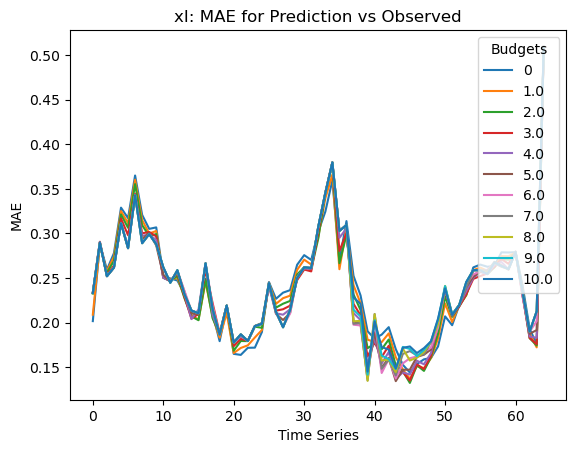

In [37]:
for i, b in enumerate(budgets):
    xI_est = result_dict['xI'][i]
    xI_diff = np.mean(np.absolute(xI_obs - xI_est), axis=1)
    plt.plot(xI_diff, label=b)

plt.legend(title='Budgets')
plt.title('xI: MAE for Prediction vs Observed')
plt.xlabel('Time Series')
plt.ylabel('MAE')
_ = plt.show()

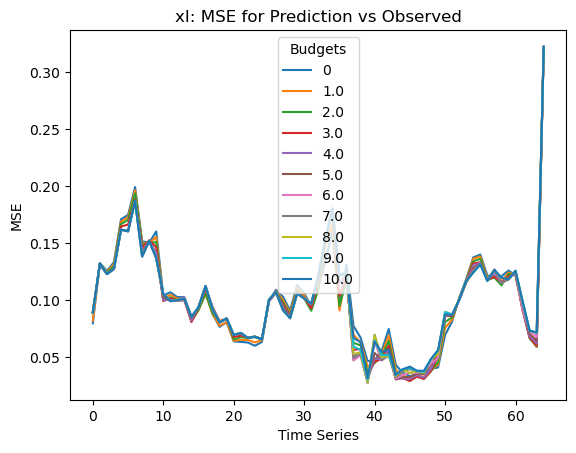

In [40]:
for i, b in enumerate(budgets):
    xI_est = result_dict['xI'][i]
    xI_diff = np.mean(np.square(xI_obs - xI_est), axis=1)
    plt.plot(xI_diff, label=b)

plt.legend(title='Budgets')
plt.title('xI: MSE for Prediction vs Observed')
plt.xlabel('Time Series')
plt.ylabel('MSE')
_ = plt.show()

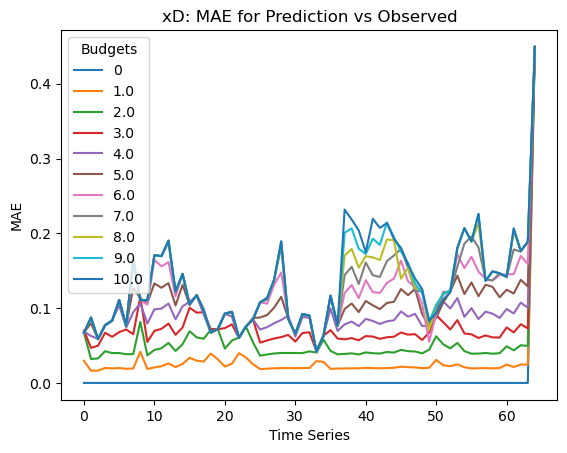

In [38]:
for i, b in enumerate(budgets):
    xD_est = result_dict['xD'][i]
    xD_diff = np.mean(np.absolute(xD_obs - xD_est), axis=1)
    plt.plot(xD_diff, label=b)

plt.legend(title='Budgets')
plt.title('xD: MAE for Prediction vs Observed')
plt.xlabel('Time Series')
plt.ylabel('MAE')
_ = plt.show()

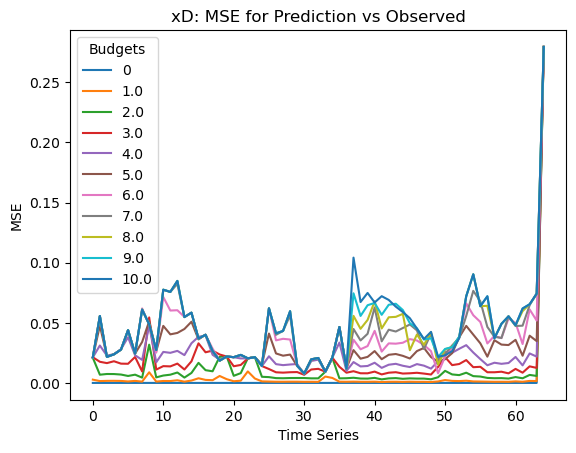

In [41]:
for i, b in enumerate(budgets):
    xD_est = result_dict['xD'][i]
    xD_diff = np.mean(np.square(xD_obs - xD_est), axis=1)
    plt.plot(xD_diff, label=b)

plt.legend(title='Budgets')
plt.title('xD: MSE for Prediction vs Observed')
plt.xlabel('Time Series')
plt.ylabel('MSE')
_ = plt.show()

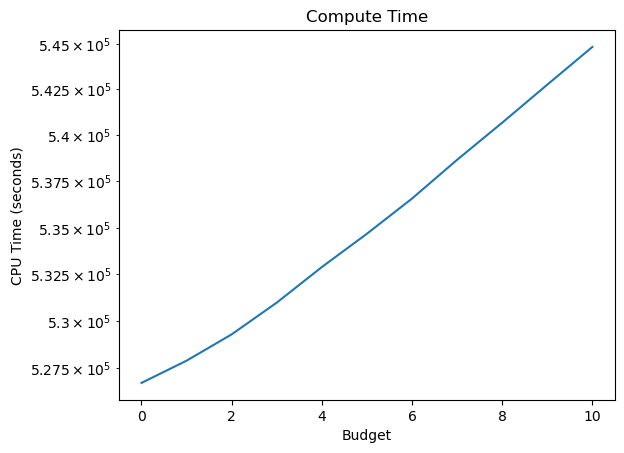

In [32]:
plt.plot(budgets, time_mat)
plt.yscale('log')

plt.title('Compute Time')
plt.xlabel('Budget')
plt.ylabel('CPU Time (seconds)')

_ = plt.show()

In [47]:
plt.plot(budget, np.mean(improv_mat, axis=0))
#plt.yscale('log')

plt.title('Average Loss')
plt.xlabel('Budget')
plt.ylabel('Loss')

_ = plt.show()

NameError: name 'budget' is not defined